In [38]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np

In [31]:
r = requests.get('https://www.hockey-reference.com/').text
tables = pd.read_html(r, header=0)
tables[0]

,Eastern,W,L,OL,PTS,RW,RgRec,RgPt%
0,Atlantic,Atlantic,Atlantic,Atlantic,Atlantic,Atlantic,Atlantic,Atlantic
1,BOS*,65,12,5,135,54,54-12-16,.756
2,TOR*,50,21,11,111,42,42-21-19,.628
3,TBL*,46,30,6,98,38,38-30-14,.549
4,FLA*,42,32,8,92,36,36-32-14,.524
5,BUF,42,33,7,91,30,30-33-19,.482
6,OTT,39,35,8,86,31,31-35-16,.476
7,DET,35,37,10,80,28,28-37-17,.445
8,MTL,31,45,6,68,21,21-45-16,.354
9,Metropolitan,Metropolitan,Metropolitan,Metropolitan,Metropolitan,Metropolitan,Metropolitan,Metropolitan


In [39]:
# Split Atlantic and Metropolitan tables up
Atlantic = tables[0][1:9].reset_index(drop = True)
Atlantic.rename(columns={'Eastern': 'Team'}, inplace=True)
Atlantic

,Team,W,L,OL,PTS,RW,RgRec,RgPt%
0,BOS*,65,12,5,135,54,54-12-16,.756
1,TOR*,50,21,11,111,42,42-21-19,.628
2,TBL*,46,30,6,98,38,38-30-14,.549
3,FLA*,42,32,8,92,36,36-32-14,.524
4,BUF,42,33,7,91,30,30-33-19,.482
5,OTT,39,35,8,86,31,31-35-16,.476
6,DET,35,37,10,80,28,28-37-17,.445
7,MTL,31,45,6,68,21,21-45-16,.354


In [40]:
Metropolitan = tables[0][10:].reset_index(drop = True)
Metropolitan.rename(columns={'Eastern': 'Team'}, inplace=True)
Metropolitan

,Team,W,L,OL,PTS,RW,RgRec,RgPt%
0,CAR*,52,21,9,113,39,39-21-22,.610
1,NJD*,52,22,8,112,39,39-22-21,.604
2,NYR*,47,22,13,107,37,37-22-23,.591
3,NYI*,42,31,9,93,36,36-31-15,.530
4,PIT,40,31,11,91,31,31-31-20,.500
5,WSH,35,37,10,80,27,27-37-18,.439
6,PHI,31,38,13,75,26,26-38-18,.427
7,CBJ,25,48,9,59,15,15-48-19,.299


Text(0.5, 1.0, 'Points Scored by Atlantic Teams')

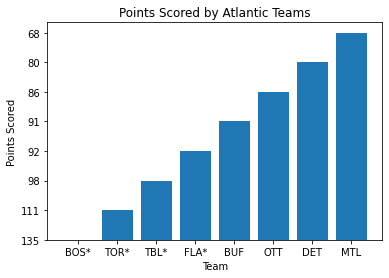

In [49]:
plt.bar(Atlantic.Team, Atlantic.PTS, bottom=0)
plt.xlabel('Team')
plt.ylabel('Points Scored')
plt.title('Points Scored by Atlantic Teams')

In [50]:
Atlantic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Team    8 non-null      object
 1   W       8 non-null      object
 2   L       8 non-null      object
 3   OL      8 non-null      object
 4   PTS     8 non-null      object
 5   RW      8 non-null      object
 6   RgRec   8 non-null      object
 7   RgPt%   8 non-null      object
dtypes: object(8)
memory usage: 640.0+ bytes


In [51]:
# Converting object classes to integers and then the percentage column to a floating point value
columns_to_convert = ['W', 'L', 'OL', 'PTS', 'RW']
Atlantic[columns_to_convert] = Atlantic[columns_to_convert].astype(int)

Metropolitan[columns_to_convert] = Metropolitan[columns_to_convert].astype(int)

Atlantic['RgPt%'] = Atlantic['RgPt%'].astype(float)
Metropolitan['RgPt%'] = Metropolitan['RgPt%'].astype(float)

In [52]:
print(Atlantic.info())
print(Metropolitan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Team    8 non-null      object 
 1   W       8 non-null      int64  
 2   L       8 non-null      int64  
 3   OL      8 non-null      int64  
 4   PTS     8 non-null      int64  
 5   RW      8 non-null      int64  
 6   RgRec   8 non-null      object 
 7   RgPt%   8 non-null      float64
dtypes: float64(1), int64(5), object(2)
memory usage: 640.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Team    8 non-null      object 
 1   W       8 non-null      int64  
 2   L       8 non-null      int64  
 3   OL      8 non-null      int64  
 4   PTS     8 non-null      int64  
 5   RW      8 non-null      int64  
 6   RgRec   8 non-null      object 
 7   RgPt%   8 non-null  

Text(0.5, 1.0, 'Points Scored by Atlantic Teams')

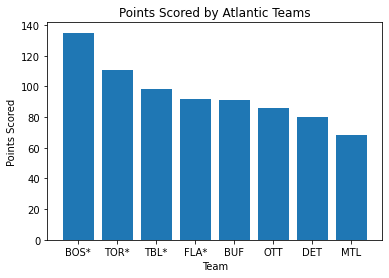

In [53]:
# Same bar chart
plt.bar(Atlantic.Team, Atlantic.PTS, bottom=0)
plt.xlabel('Team')
plt.ylabel('Points Scored')
plt.title('Points Scored by Atlantic Teams')